In [1]:
import pandas as pd
import numpy as np
import json
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os

%matplotlib inline
sns.set()

In [2]:
with open("../data/yelp_academic_dataset_review.json","r", encoding='utf-8') as json_file:
    data=json_file.readlines()
    data = list(map(json.loads,data))

In [3]:
df= pd.DataFrame(data)

In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [5]:
df.describe()

,stars,useful,funny,cool
count,8.635403e+06,8.635403e+06,8.635403e+06,8.635403e+06
mean,3.730959e+00,1.249294e+00,4.194358e-01,5.022635e-01
std,1.456809e+00,3.204236e+00,1.869675e+00,2.244378e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,7.580000e+02,6.100000e+02,7.320000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635403 entries, 0 to 8635402
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 592.9+ MB


E:\Anaconda3\envs\aiap_gpu2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stars', ylabel='count'>

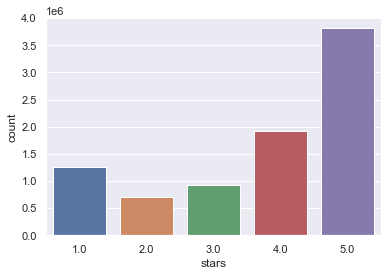

In [7]:
sns.countplot(df["stars"])

In [8]:
def get_word_count(text):
    words=text.split()
    return len(words)

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def clean_text(text , remove_digits = True):
    
    #remove url in the text
    cleaned_text = re.sub(r"https://\S+","",text)
    #strip html tags
    cleaned_text = strip_html_tags(text)
    #removed accented chars
    cleaned_text = remove_accented_chars(cleaned_text)
    # remove other special characters, keeping only alphabets
    cleaned_text = remove_special_characters(text, remove_digits)
    # replace space char that is longer than 1 to just 1 space
    clean_text = re.sub(r"\s+", ' ',cleaned_text)
    # remove trailing white spaces and lower cased all letters
    cleaned_text = clean_text.strip().lower()
    
    return cleaned_text
    

df["cleaned_text"] = df["text"].apply(clean_text)

In [37]:
def duplicated_row_removal(df):
    
    duplicates = df.duplicated(keep=False)
    
    if df[duplicates].empty:
        print("There are no duplicates")
    else:
        print("{} duplicated rows are drop".format(df[duplicates]))

In [38]:
duplicated_row_removal(df)

There are no duplicates


In [9]:
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

In [10]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_length
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,322
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,122
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,114
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,72
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,36


In [11]:
df["stars"] = df["stars"].astype("category")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635403 entries, 0 to 8635402
Data columns (total 10 columns):
 #   Column       Dtype   
---  ------       -----   
 0   review_id    object  
 1   user_id      object  
 2   business_id  object  
 3   stars        category
 4   useful       int64   
 5   funny        int64   
 6   cool         int64   
 7   text         object  
 8   date         object  
 9   text_length  int64   
dtypes: category(1), int64(4), object(5)
memory usage: 601.2+ MB


In [13]:
df["stars"].value_counts()

5.0    3814532
4.0    1920037
1.0    1262800
3.0     926656
2.0     711378
Name: stars, dtype: int64

<AxesSubplot:xlabel='text_length', ylabel='Count'>

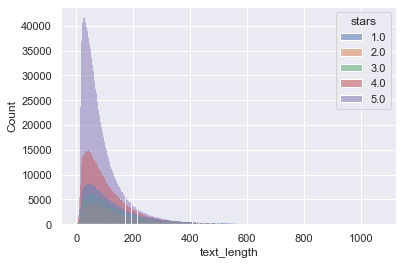

In [14]:
sns.histplot(x = "text_length", data=df, hue = "stars")

In [40]:
df["text"].isnull().values.any()

False

In [15]:
df_useful = df[df["useful"]>0]

In [16]:
df_useful.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_length
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,322
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,122
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,72
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03,57
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4.0,1,0,0,I am definitely a fan of Sports Authority. Th...,2012-05-28 15:00:47,90


In [17]:
df_useful_final=df_useful[["useful","text","stars","text_length"]]

In [18]:
df_useful_final.head()

,useful,text,stars,text_length
0,3,Apparently Prides Osteria had a rough summer a...,4.0,322
1,1,This store is pretty good. Not as great as Wal...,4.0,122
3,1,I've stayed at many Marriott and Renaissance M...,2.0,72
5,2,"This place used to be a cool, chill place. Now...",1.0,57
8,1,I am definitely a fan of Sports Authority. Th...,4.0,90


In [19]:
df_useful_final["stars"].value_counts()

5.0    1499181
4.0     858043
1.0     718111
3.0     425177
2.0     376723
Name: stars, dtype: int64

In [20]:
df_useful_final["sentiment"]=df_useful_final["stars"].map({1.0:"poor", 2.0:"poor",3.0:"satisfied",4.0:"satisfied",5.0:"impressed" })

E:\Anaconda3\envs\aiap_gpu2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_useful_final.head()

,useful,text,stars,text_length,sentiment
0,3,Apparently Prides Osteria had a rough summer a...,4.0,322,satisfied
1,1,This store is pretty good. Not as great as Wal...,4.0,122,satisfied
3,1,I've stayed at many Marriott and Renaissance M...,2.0,72,poor
5,2,"This place used to be a cool, chill place. Now...",1.0,57,poor
8,1,I am definitely a fan of Sports Authority. Th...,4.0,90,satisfied


In [22]:
df_useful_final["sentiment"].value_counts()

impressed    1499181
satisfied    1283220
poor         1094834
Name: sentiment, dtype: int64

In [48]:
np.random.seed(24)
#randomly dropping 1094834 samples of poor to get 50k samples
choice = np.random.choice(df_useful_final.index[df_useful_final["sentiment"]=="poor"],1044834,replace=False)

In [49]:
df_useful_final_downsample = df_useful_final.drop(choice)

In [50]:
df_useful_final_downsample["sentiment"].value_counts()

impressed    1499181
satisfied    1283220
poor           50000
Name: sentiment, dtype: int64

In [66]:
undersample = RandomUnderSampler(sampling_strategy="auto",random_state=5)
X_under_50k, y_under_50k = undersample.fit_resample(df_useful_final_downsample[["text"]],df_useful_final_downsample[["sentiment"]])

In [67]:
#down sampled
y_under_50k.value_counts()

sentiment
satisfied    50000
poor         50000
impressed    50000
dtype: int64

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X_under_50k,y_under_50k,test_size=0.3,random_state=5,stratify=y_under_50k)

In [69]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((105000, 1), (45000, 1), (105000, 1), (45000, 1))

In [70]:
#y train has been downsampled to 50000 * 0.7 (train size) = 35000
y_train.value_counts()

sentiment
satisfied    35000
poor         35000
impressed    35000
dtype: int64

In [71]:
#y test has been downsampled to 50000 * 0.3 (test size) = 15000
y_test.value_counts()

sentiment
satisfied    15000
poor         15000
impressed    15000
dtype: int64

In [73]:
train_df_50k = pd.concat([X_train,y_train],axis=1)

In [74]:
train_df_50k.head()

,text,sentiment
148117,My dog developed an allergy a few months back ...,satisfied
139853,I loved this place from the moment I walked in...,satisfied
138356,"I wanted a laptop, but I didn't want to have t...",satisfied
40877,Great Banh Mi and service for a good price. Th...,impressed
6176,This was my first time and I totally recommend...,impressed


In [75]:
train_df_50k.shape

(105000, 2)

In [76]:
test_df_50k = pd.concat([X_test,y_test],axis=1)

In [79]:
test_df_50k.head()

,text,sentiment
85294,I returned back to this place because I enjoye...,poor
128513,This is the first place I shop for fabric beca...,satisfied
97848,This hotel has been a nightmare. Mixed up our ...,poor
39176,I lived in Korea for a year in my young adulth...,impressed
110725,The vibe and location of the shop is a little ...,satisfied


In [80]:
test_df_50k.shape

(45000, 2)

In [34]:
directory="../data"

if not os.path.exists(directory):
    os.mkdir(directory)

In [81]:
train_df_50k.to_csv("../data/train_50k.csv",index=False)
test_df_50k.to_csv("../data/test_50k.csv",index=False)